In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
df = pd.read_csv('../../Data/location_rev.csv')
df.head()

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80              3.0       30527.57               1407.0   
1  38628.37              3.0       30185.49               1025.0   
2  39715.16              1.0       32182.24               1498.0   
3  35593.30              5.0       29728.65               2340.0   
4  35128.18              4.0       30691.17                847.0   

   population_density  location_age  
0              3302.0          12.0  
1              4422.0          11.0  
2              3260.0          12.0  
3              4325.0          10.0  
4              3774.0          11.0

In [3]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

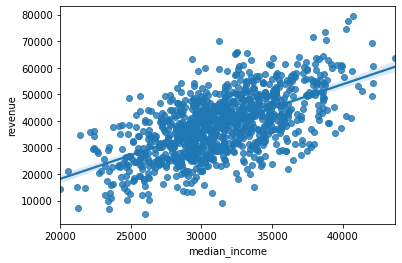

In [4]:
sns.regplot(data=df, x='median_income', y='revenue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


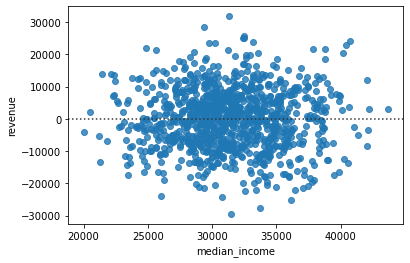

In [5]:
sns.residplot(df.median_income, df.revenue)
plt.show()

#### MSE cao vì phần dư khá cao và không được trải đều trên trục x, mô hình phi tuyến có thể phù hợp hơn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X1 = df[['median_income']]
y1 = df['revenue']

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [11]:
y1_pred = model.predict(X1_test)

In [12]:
intercept = model.intercept_ #b
slope = model.coef_[0] #m model.coef_: array[m1, m2, m3,...]

In [13]:
print(intercept, slope)

-17944.393212607923 1.8044776691444888


In [14]:
model.score(X1, y1)

0.3618738533973396

In [15]:
model.score(X1_train, y1_train)

0.37376263809946475

In [16]:
model.score(X1_test, y1_test)

0.3246804918433006

#### Cả train và test đều có R^2 thấp => model bị underfitting
#### Solution: thêm thuộc tính cho input


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mse = mean_squared_error(y1_pred, y1_test)
print(mse)

90952579.47704403


In [19]:
mae = mean_absolute_error(y1_pred, y1_test)
print(mae)

7751.936386800821


#### MSE, MAE cao cho thấy sự chênh lệch lớn giữa y dữ đoán và y thực tế

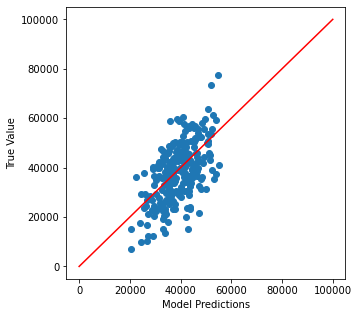

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(y1_pred, y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
# Dự vào range min max của cột target
plt.plot([0, 100000], [0, 100000], 'k-', color='r')
plt.show()

#### Y predict và y thực tế không nằm trên đường thẳng => model không dùng được

In [21]:
# Multiple Linear Regression

In [22]:
X = df[['num_competitors','median_income','num_loyalty_members','population_density','location_age']]
y = df['revenue']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model_all.predict(X_test)

In [26]:
model_all.intercept_ #b

-51812.60099412097

In [27]:
model_all.coef_ #m model.coef_: array[m1, m2, m3,...]

array([-2.07278264e+03,  1.75664026e+00,  3.44931957e+00,  4.19605202e+00,
        2.05476936e+03])

In [28]:
model_all.score(X, y)

0.8132461509626003

In [29]:
model_all.score(X_train, y_train)

0.8151586089690087

In [30]:
model_all.score(X_test, y_test)

0.8071185035764246

#### 81% variation của revenue giải thích được bằng model này

In [31]:
mean_squared_error(y_pred, y_test)

25977436.489285875

In [32]:
mean_absolute_error(y_pred, y_test)

4211.766053217498

#### MSE, MAE thấp cho thấy chênh lệch nhỏ giữa y dự đoán và y thực tế

In [33]:
X_new = pd.DataFrame({
    'num_competitors': [3, 6],
    'median_income': [30000, 28000],
    'num_loyalty_members': [1200, 900],
    'population_density': [2000, 2500],
    'location_age': [10, 15]
})

In [34]:
y_new = model_all.predict(X_new)
print(y_new)

[27747.24013021 29352.68862158]


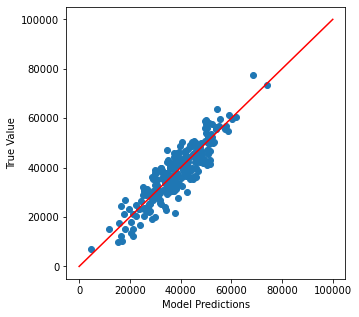

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred, y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
# Dự vào range min max của cột target
plt.plot([0, 100000], [0, 100000], 'k-', color='r')
plt.show()

#### Y predict và y thực tế nằm sát trên đường thẳng => model dùng được

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

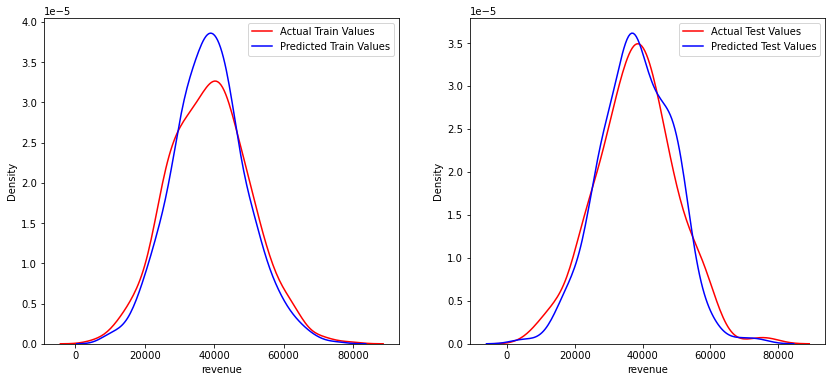

In [36]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
ax1 = sns.distplot(y_train, hist=False, color='r',
                  label="Actual Train Values")
sns.distplot(model_all.predict(X_train), hist=False, color='b',
            label="Predicted Train Values", ax=ax1)
plt.legend()
plt.subplot(1, 2, 2)
ax2 = sns.distplot(y_test, hist=False, color='r',
                  label="Actual Test Values")
sns.distplot(model_all.predict(X_test), hist=False, color='b',
            label="Predicted Test Values", ax=ax2)
plt.legend()
plt.show()

In [37]:
from scipy.stats.stats import pearsonr

In [38]:
pearsonr(model_all.predict(X_test), y_test)

(0.8987229545498896, 9.180014250104791e-91)

## LỰA CHỌN THUỘC TÍNH

In [39]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [40]:
# Aplly SelectKBest class to extract all best features
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [41]:
# Concat 2 dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # Naming the dataframe columns
# Sorting in descending order
featureScores.sort_values("Score", ascending=False, inplace=True)
print(featureScores)

                 Specs       Score
1        median_income  566.922357
4         location_age  439.125397
3   population_density  107.360798
2  num_loyalty_members   30.949544
0      num_competitors   25.117590


In [42]:
corrmat=df.corr()
top_corr_features = corrmat.index

In [43]:
import matplotlib

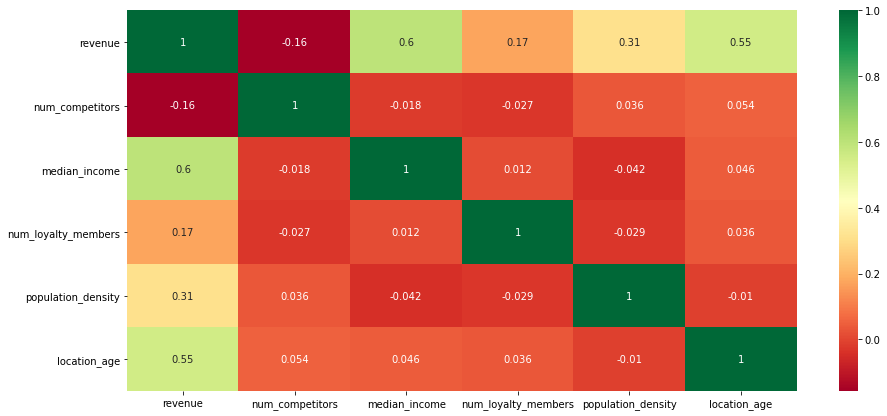

In [44]:
plt.figure(figsize=(15, 7))
# plot heat map
g = sns.heatmap(corrmat, cmap="RdYlGn", annot=True) # annot = True: in tât cả giá trị
plt.show()

## Lựa chọn 3 thuộc tính cao nhất

In [45]:
X2 = df[['median_income', 'location_age', 'population_density']]
y2 = df['revenue']

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [47]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [48]:
model2.score(X2, y2)

0.7550791792396877

In [49]:
model2.score(X2_train, y2_train)

0.7614626136698167

In [50]:
model2.score(X2_test, y2_test)

0.7352770123334729

#### 73% variation của revenue giải thích được bằng model này

In [51]:
mean_squared_error(model2.predict(X2_test), y2_test)

35653106.83954584

In [52]:
mean_absolute_error(model2.predict(X2_test), y2_test)

4837.812526866439